# Project Python Foundations: FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
# returns the first 5 rows
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
print("No. of rows :",df.shape[0],"and No. of columns:",df.shape[1])

No. of rows : 1898 and No. of columns: 9


#### Observations:
The FoodHub dataframe has 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)


In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


1.   No missing (i.e. null) values across all columns
2.   Most of the dtypes (int64, object, and float64) are appropriate
3. There are 5 numerical columns in the data and 4 object type columns.
4. Rating column is being read as object type column but it should be in int
5.  A memory usage of 133.6+ KB



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
#df.isna().sum()
#df.isnull().sum()
#print(df['delivery_time'].unique())

print("rating unique values :",df['rating'].unique())
print("-"*50)

# replacing values with nan
df['rating'] = df['rating'].replace(['Not given'],np.nan)
print("After replacing with nan, unique values of rating :",df['rating'].unique())
print(df['rating'].apply(type).value_counts())
print("-"*50)

#changing the data type to float
print("changing the rating column data type to float:")
df['rating'] = df['rating'].astype(float)
print("-"*50)
print(df.info())
print("-"*50)

#checking missing values count
print("Missing values count:")
print(df.isnull().sum())
print("-"*50)



rating unique values : ['Not given' '5' '3' '4']
--------------------------------------------------
After replacing with nan, unique values of rating : [nan '5' '3' '4']
<class 'str'>      1162
<class 'float'>     736
Name: rating, dtype: int64
--------------------------------------------------
changing the rating column data type to float:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898

#### Observations:


1.   We see that the data types of Rating column have been fixed.
2.   There are 6 numerical columns in the data and 3 object type columns.
3. We observe that rating columns have less entries which indicates the presence of missing values in the data
4. Rating column have 736 missing values
5. We will treat these missing values after understanding the distributions of features in the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations:


*   order costs range from about 4 to 35 USD with an average order cost of 16 USD
*   There is a 13 USD difference between the 3rd quartile and the maximum value of cost_of_the_order which indicates there might be outliers present in this column.
* The average order rating is 4 and there is no difference between the 3rd quartile and the maximum value of rating
* food preparation and delivery time seem to be more normalized
* The average food preparation time is 27 minutes and average delivery time of 24 minutes.




### **Question 5:** How many orders are not rated?

In [ ]:
#df['rating'].isna().value_counts()
df.groupby(df['rating'].isna())[['order_id']].count()

,order_id
rating,
False,1162
True,736


#### Observations:
736 of the 1898 orders do not have a rating

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

In [ ]:
df.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      3
food_preparation_time      16
delivery_time              19
dtype: int64

#### Variable : order_id

In [ ]:
# check unique order ID
df['order_id'].nunique()

1898

#### Observations:
There is a total of 1898 unique orders.

#### Variable : customer_id

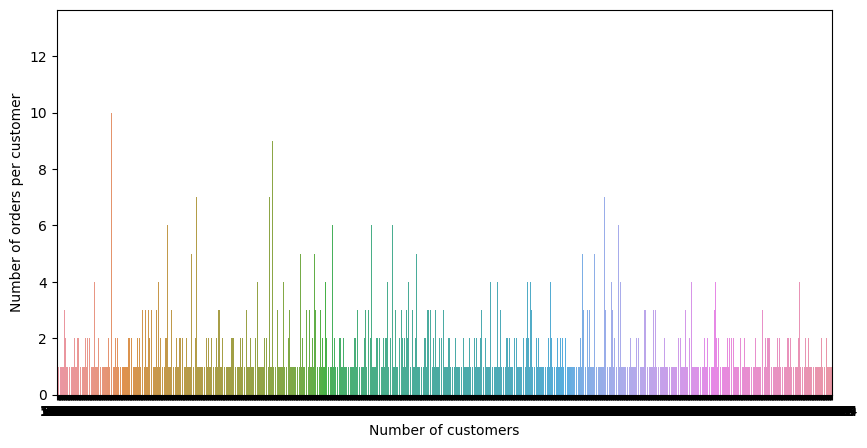

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.countplot(data = df, x = 'customer_id');
ax.set(xlabel="Number of customers")
ax.set(ylabel='Number of orders per customer')
plt.show()

In [ ]:
# check unique customer_id
df['customer_id'].nunique()

1200

In [ ]:
df['customer_id'].value_counts().unique()

array([13, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

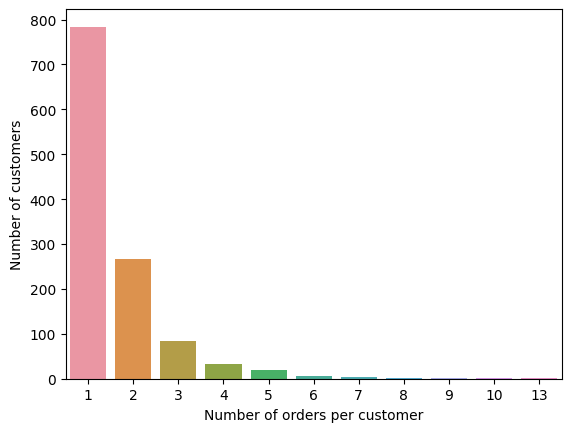

In [ ]:
#countplot : Number of orders per customer
ax = sns.countplot(data = df, x = df['customer_id'].value_counts());
ax.set(xlabel="Number of orders per customer")
ax.set(ylabel='Number of customers')
plt.show()

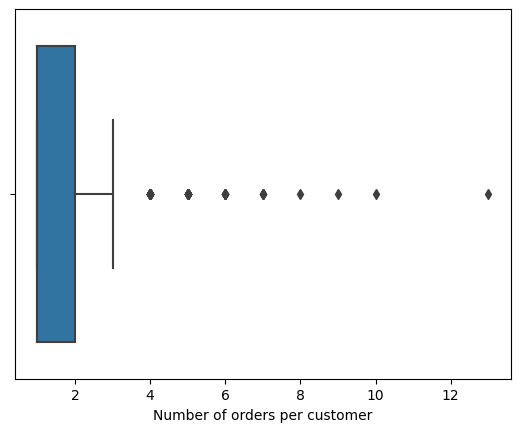

In [ ]:
#boxplot: Number of orders per customer
ax = sns.boxplot(data=df, x = df['customer_id'].value_counts())
ax.set(xlabel="Number of orders per customer")
plt.show()

In [ ]:
customerId = df.groupby(df['customer_id'])[['customer_id']].count() > 5
print("Total customers made the order more than 5 times:",customerId['customer_id'].value_counts()[True])


Total customers made the order more than 5 times: 14


In [ ]:
customerId = df.groupby(df['customer_id'])[['customer_id']].count() ==2
print("Total customers made the order 2 times:",customerId['customer_id'].value_counts()[True])

Total customers made the order 2 times: 267


In [ ]:
print("Customer orders and order frequency")
customer_orders = df.groupby(['customer_id'])[['order_id']].count()
print(customer_orders.groupby(['order_id']).value_counts())

Customer orders and order frequency
order_id
1     784
2     267
3      83
4      33
5      19
6       6
7       4
8       1
9       1
10      1
13      1
dtype: int64


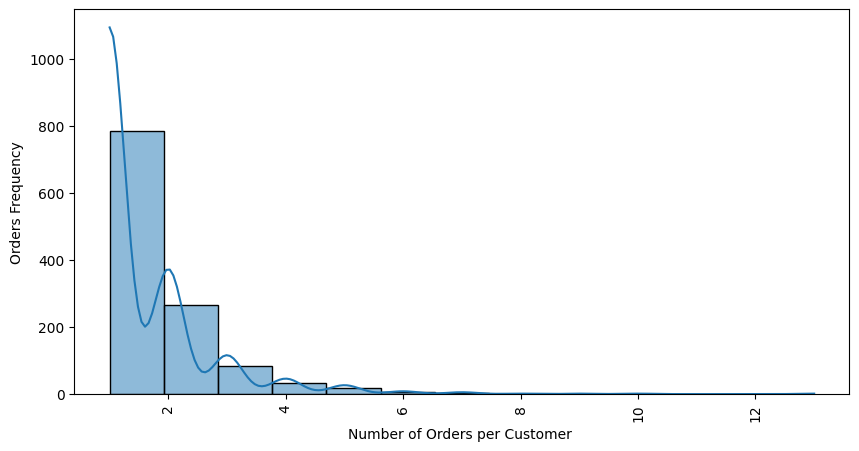

In [ ]:
#Customer Orders
plt.figure(figsize = (10,5));
ax = sns.histplot(data = customer_orders, x = 'order_id',bins=13, kde = True)
ax.set(xlabel="Number of Orders per Customer ")
ax.set(ylabel='Orders Frequency')
plt.xticks(rotation=90);
plt.show();

#### Observations:


1.   There is a total of 1200 unique customers
2.   Within these customers the order count range of 1 - 13
3. Most of the customers have made one order only
4. Only 14 customers made the order more than 5 times and 267 customers made order 2 times
5. Customers with more than 3 orders are being represented as outliers by the boxplot.



#### Variable : restaurant_name

In [ ]:
# check unique restaurant_name
df['restaurant_name'].nunique()

178

In [ ]:
#Top 5 restaurants
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

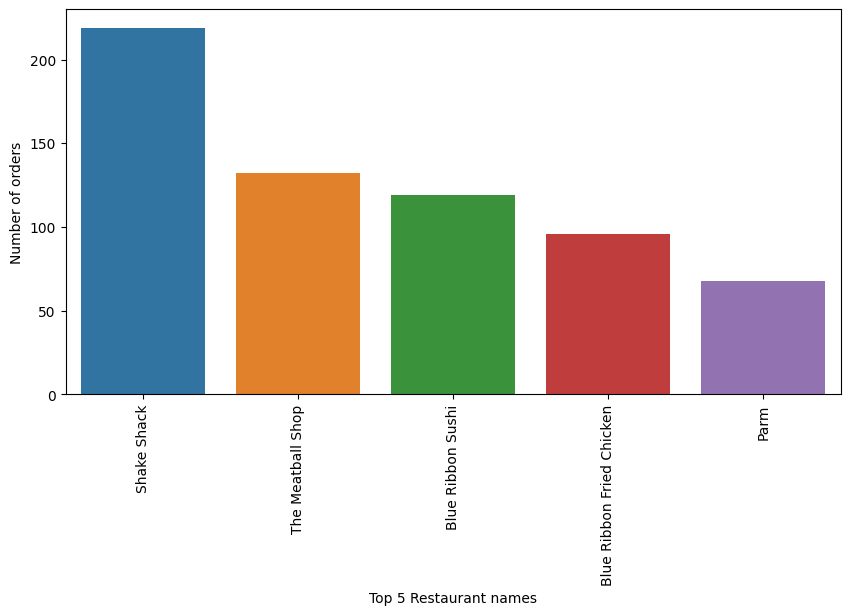

In [ ]:
#countplot : Top 5 Restaurant and Number of orders
plt.figure(figsize = (10,5));
ax = sns.countplot(data = df, x = 'restaurant_name',order = df.restaurant_name.value_counts().iloc[:5].index);
ax.set(xlabel="Top 5 Restaurant names")
ax.set(ylabel='Number of orders')
plt.xticks(rotation=90);
plt.show();

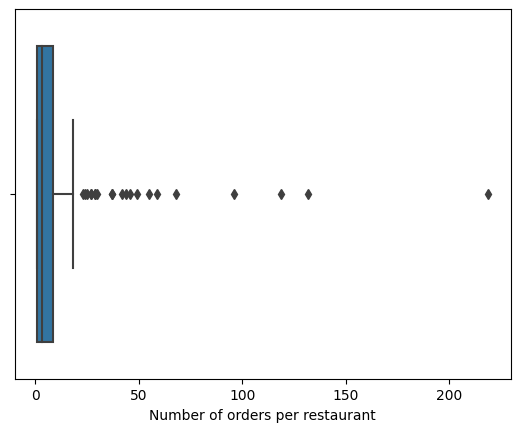

In [ ]:
#boxplot : Number of orders per restaurant
ax = sns.boxplot(data=df, x = df.restaurant_name.value_counts())
ax.set(xlabel="Number of orders per restaurant")
plt.show()

In [ ]:
customerId = df.groupby(df['restaurant_name'])[['restaurant_name']].count() < 2
print("Total number of restaurants received only 1 order:",customerId['restaurant_name'].value_counts()[True])

Total number of restaurants received only 1 order: 50


In [ ]:
customerId = df.groupby(df['restaurant_name'])[['restaurant_name']].count() >=100
print("Total number of restaurants received more than 100 orders:",customerId['restaurant_name'].value_counts()[True])

Total number of restaurants received more than 100 orders: 3


#### Observations:


1.   There is a total of 178 unique restaurants
2.   The top restaurant is Shake Shack with over 200 orders
3. Out of 178 restaurants, 50 restaurants received only 1 order and only 3 restaurants received approximately 100 orders
4. Restaurants with approximately more than 25 orders are being represented as outliers by the boxplot.



#### Variable : cuisine_type

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

In [ ]:
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

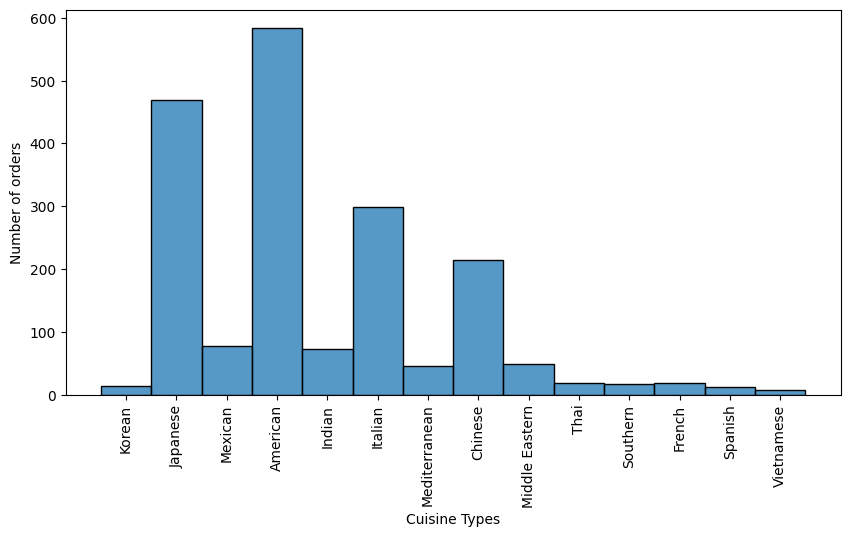

In [ ]:
#histplot : Cuisine Types and number of orders
plt.figure(figsize = (10,5));
ax = sns.histplot(data=df,x='cuisine_type')
ax.set(xlabel="Cuisine Types")
ax.set(ylabel='Number of orders')
plt.xticks(rotation=90)
plt.show()

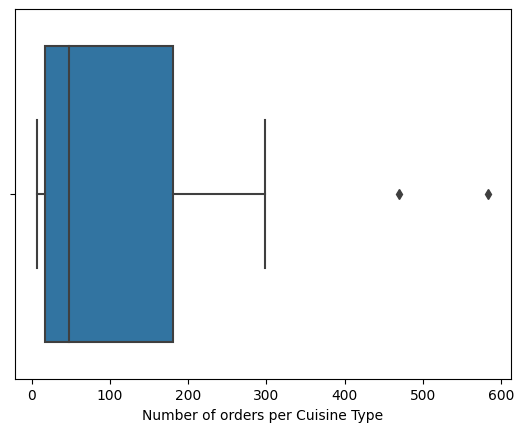

In [ ]:
#boxplot : Number of orders per Cuisine Type
ax = sns.boxplot(data=df, x = df.cuisine_type.value_counts())
ax.set(xlabel="Number of orders per Cuisine Type")
plt.show()

#### Observations:


1.   There is a total of 14 unique Cuisine Type
2.   The top Cuisine Type is American with over 500 orders
3. Cuisine Type with more than 400 orders are being represented as outliers by the boxplot.

#### Variable : cost_of_the_order

In [ ]:
#Check unique cost_of_the_order
df['cost_of_the_order'].nunique()

312

In [ ]:
df['cost_of_the_order'].value_counts()

12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
         ..
5.48      1
17.07     1
6.26      1
9.61      1
29.59     1
Name: cost_of_the_order, Length: 312, dtype: int64

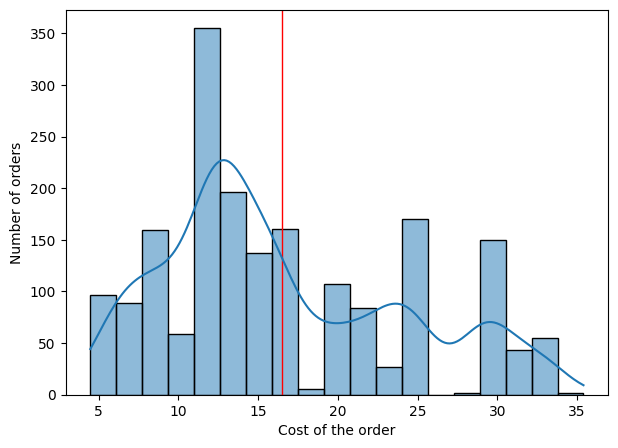

In [ ]:
## Histogram for the cost of order
plt.figure(figsize = (7,5))
plt.axvline(df['cost_of_the_order'].mean(), color='r', linewidth=1)
ax = sns.histplot(data=df,x='cost_of_the_order',kde=True)
ax.set(xlabel="Cost of the order")
ax.set(ylabel='Number of orders')
plt.show()

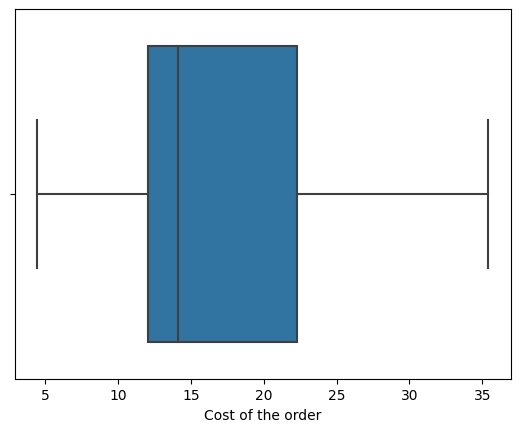

In [ ]:
#boxplot : Cost of the order
ax = sns.boxplot(data=df, x = 'cost_of_the_order')
ax.set(xlabel="Cost of the order")
plt.show()

#### Observations:
As per the histogram and box plot, it can be inferred that cost_of_the_order is right-skewed.

1.   The histogram shows a long right tail and the mean (Red Line) is also to the right of the peak
2.   The box plot shows a longer right whisker




#### Variable : day_of_the_week

In [ ]:
# check unique day_of_the_week
df['day_of_the_week'].nunique()

2

In [ ]:
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

In [ ]:
# Weekend order percent
print("Weekend order percent:",((1351/1898)*100))

Weekend order percent: 71.18018967334035


In [ ]:
# Weekday order percent
print("Weekday order percent:",((547/1898)*100))

Weekday order percent: 28.81981032665964


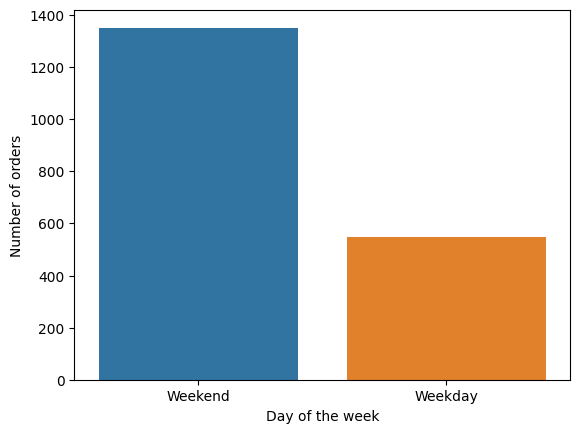

In [ ]:
#countplot : Day of the week and Number of orders
ax = sns.countplot(data = df, x ='day_of_the_week');
ax.set(xlabel="Day of the week")
ax.set(ylabel='Number of orders')
plt.show()

#### Observations:
Most of the FoodHub orders are placed on the weekend.


1.   Weekend - 71% of total orders
2.   Weekday - 29% of total orders



#### Variable : rating

In [ ]:
print("unique ratings :",df['rating'].unique())

unique ratings : [nan  5.  3.  4.]


In [ ]:
print("Order rating counts:")
df['rating'].value_counts()

Order rating counts:


5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

In [ ]:
print("Orders not rated :",df['rating'].isna().value_counts()[True])

Orders not rated : 736


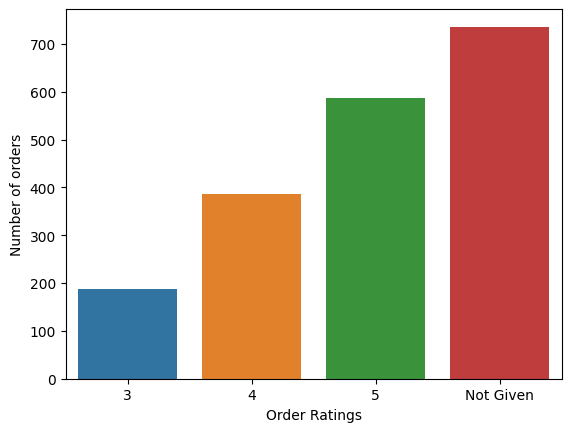

In [ ]:
#countplot : Order Ratings
df1=df.sort_values('rating')
df1['rating'] = df1['rating'].fillna("NaN")
ax = sns.countplot(data = df1, x = 'rating');
ax.set(xlabel="Order Ratings")
ax.set(ylabel='Number of orders')
plt.xticks(np.arange(4), ("3","4","5","Not Given"))
plt.show();

#### Observations:
1. Most of the placed orders has not given ratings.
2. Orders with ratings range from 3-5 and majority given a 5 rating

#### Variable : food_preparation_time

In [ ]:
# check unique food_preparation_time
df['food_preparation_time'].unique()

array([25, 23, 20, 28, 33, 21, 29, 34, 24, 30, 35, 32, 31, 27, 22, 26])

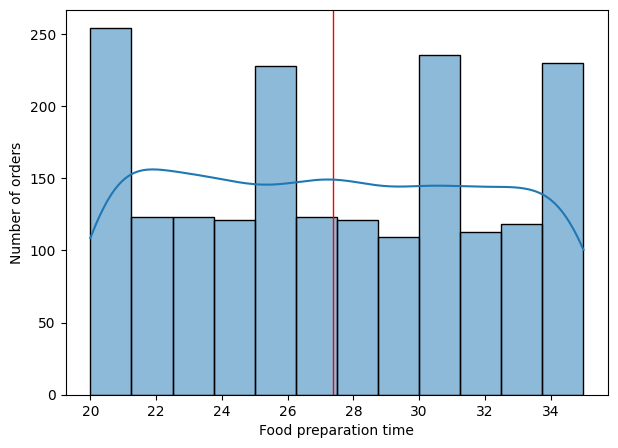

In [ ]:
#histplot : Food preparation time
plt.figure(figsize = (7,5));
plt.axvline(df['food_preparation_time'].mean(), color='r', linewidth=1)
ax = sns.histplot(data = df, x = 'food_preparation_time', kde = True);
ax.set(xlabel="Food preparation time")
ax.set(ylabel='Number of orders')
#plt.xticks(rotation=90);
plt.show();

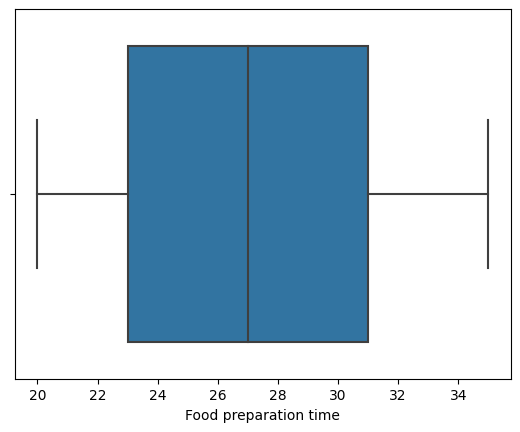

In [ ]:
#boxplot : Food preparation time
ax = sns.boxplot(data=df, x = df.food_preparation_time)
ax.set(xlabel="Food preparation time")
plt.show()

#### Observations:


1.   Food preparation time looks like normal distribution and a minimum of 20 minutes and maximum of 35 minutes.
2.   The average food preparation time is almost 27 minutes.



#### Variable : delivery_time

In [ ]:
# check unique delivery_time
df['delivery_time'].unique()

array([20, 23, 28, 15, 24, 21, 30, 26, 22, 17, 25, 16, 29, 27, 18, 31, 32,
       19, 33])

In [ ]:
df['delivery_time'].value_counts()

24    162
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     77
32     59
33     49
31     41
Name: delivery_time, dtype: int64

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


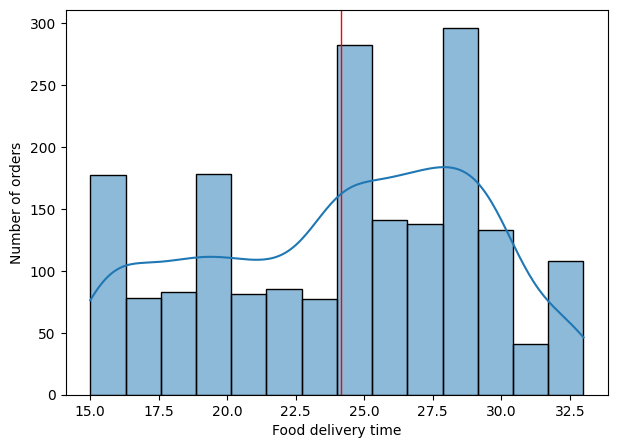

In [ ]:
#histplot : Food delivery time
plt.figure(figsize = (7,5));
plt.axvline(df['delivery_time'].mean(), color='r', linewidth=1)
ax = sns.histplot(data = df, x = 'delivery_time', kde = True);
ax.set(xlabel="Food delivery time")
ax.set(ylabel='Number of orders')
plt.show();

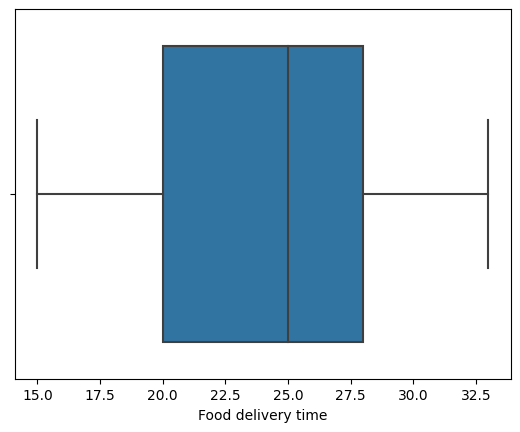

In [ ]:
#boxplot : Food delivery time
ax = sns.boxplot(data=df, x = df.delivery_time)
ax.set(xlabel="Food delivery time")
plt.show()

In [ ]:
#orders with delivery times greater than 24 minutes
print("Total orders with delivery times greater than 24 minutes:",(df[df.delivery_time>24].groupby('delivery_time')['delivery_time'].count()).sum())
print("Percent of orders with delivery times greater than 24 minutes:",(df[df.delivery_time>24].groupby('delivery_time')['delivery_time'].count()).sum()/1898)


Total orders with delivery times greater than 24 minutes: 977
Percent of orders with delivery times greater than 24 minutes: 0.5147523709167545


#### Observations:
1. As per the histogram and boxplot it can be inferred that delivery_time is left-skewed.
2. Almost 50% of the orders delivery time greater than 24 minutes


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
df['restaurant_name'].value_counts().sort_values(ascending=False).head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

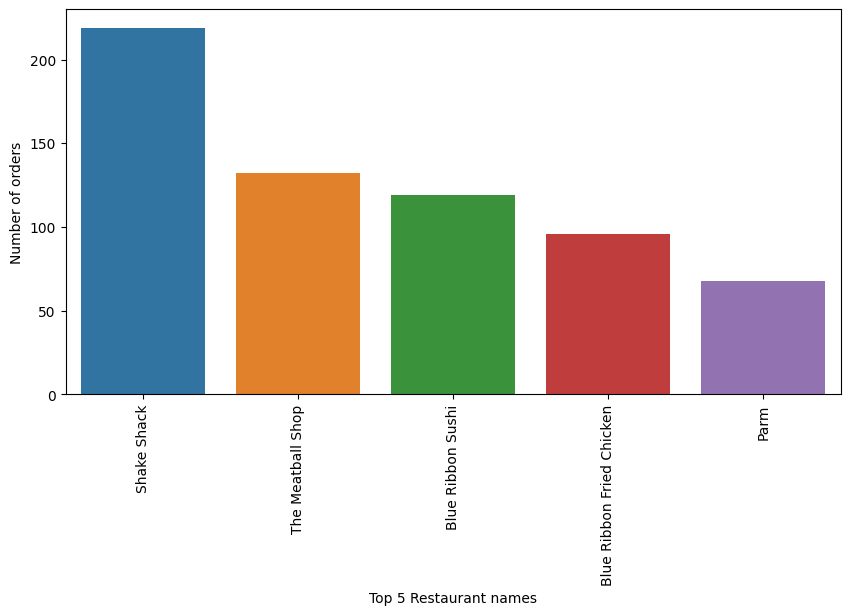

In [ ]:
#countplot : Top 5 Restaurant names and orders
plt.figure(figsize = (10,5));
ax = sns.countplot(data = df, x = 'restaurant_name',order = df.restaurant_name.value_counts().sort_values(ascending=False).iloc[:5].index);
ax.set(xlabel="Top 5 Restaurant names")
ax.set(ylabel='Number of orders')
plt.xticks(rotation=90);
plt.show();

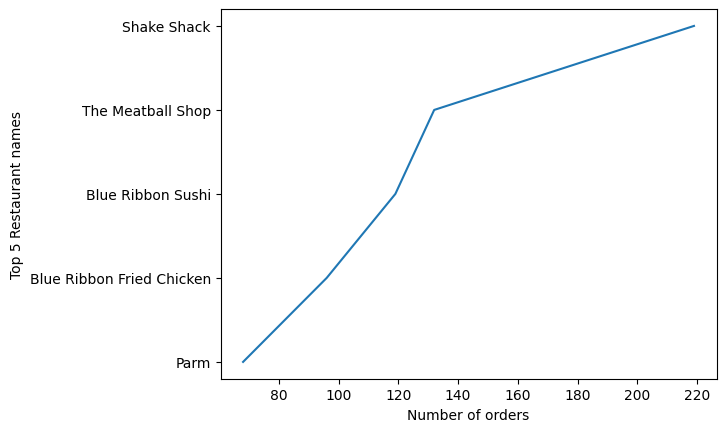

In [ ]:
#lineplot : Top 5 Restaurant and orders
#plt.figure(figsize = (10,5));
ax = sns.lineplot(data = df.restaurant_name.value_counts().iloc[:5] , x = df.restaurant_name.value_counts().iloc[:5], y = df.restaurant_name.value_counts().iloc[:5].index , errorbar=('ci', False))
ax.set(xlabel="Number of orders")
ax.set(ylabel='Top 5 Restaurant names')
plt.show();

In [ ]:
print("Top 5 restaurants orders percent:",df.restaurant_name.value_counts().sort_values(ascending=False).iloc[:5].sum()/1898)


Top 5 restaurants orders percent: 0.3340358271865121


In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations:


1.   The top restaurant is Shake Shack with over 200 orders
2.   Almost 33% of the total orders are received at top 5 restaurants




### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
df[df.day_of_the_week=='Weekend'].groupby('cuisine_type')['cuisine_type'].value_counts().sort_values(ascending=False).iloc[:3]


cuisine_type  cuisine_type
American      American        415
Japanese      Japanese        335
Italian       Italian         207
Name: cuisine_type, dtype: int64

#### Observations:
1. The top-three cuisine types for weekend orders are: American, Japanese, and Italian
2. American cuisine is the most popular on the weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
print("Total number of orders cost more than 20 dollars :",len(df[df.cost_of_the_order>20]))
print("Percentage of the orders :",round(len(df[df.cost_of_the_order>20])/len(df)*100,1))

Total number of orders cost more than 20 dollars : 555
Percentage of the orders : 29.2


#### Observations:


1.   Total of 555 FoodHub orders where the total order cost is above 20 USD.
2.   29.2% of all orders cost above 20 dollars




### **Question 10**: What is the mean order delivery time?

In [ ]:
df.describe()
#df['delivery_time'].mean()
round(df['delivery_time'].sum()/len(df['delivery_time']),1)

24.2

#### Observations:
The average/mean delivery time of total orders is 24.2 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
df['customer_id'].value_counts().sort_values(ascending=False).iloc[:3]

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:


1.   Top 3 frequent customer IDs are : 52832, 47440, 83287
2.   customer_id:52832 is the most frequent customer and has placed 13 orders



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


#### Correlation :

In [ ]:
df.corr(numeric_only=True)

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,0.006308,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,0.007753,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.033983,0.041527,-0.029949
rating,0.006308,0.007753,0.033983,1.000000,-0.006083,-0.009804
food_preparation_time,-0.007026,-0.030330,0.041527,-0.006083,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,-0.009804,0.011094,1.000000


* 1 indicates a strong positive relationship.
* -1 indicates a strong negative relationship.
* A result of zero indicates no relationship at all.

#### Observations:
This indicates that, numerical variables are not having strong positive relationship.

#### Covariance :

In [ ]:
df.cov(numeric_only=True)

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
order_id,300358.500000,-8.698972e+05,86.831165,2.558016,-17.836584,26.406695
customer_id,-869897.183973,1.292727e+10,-1124.477642,658.510215,-15974.761597,-5588.932456
cost_of_the_order,86.831165,-1.124478e+03,56.007444,0.190813,1.439700,-1.114537
rating,2.558016,6.585102e+02,0.190813,0.549790,-0.021099,-0.035847
food_preparation_time,-17.836584,-1.597476e+04,1.439700,-0.021099,21.459878,0.255564
delivery_time,26.406695,-5.588932e+03,-1.114537,-0.035847,0.255564,24.727118


Covariance is a measure of the directional relationship between two random variables

1. Positive: A positive covariance value suggests that both random variables move in the same direction.

2. Negative: A negative covariance value suggests that both random variables move in the opposite direction.

3. Zero: When the two random variables are independent of each other, the covariance between them is zero.

#### Observations:

1. [order_id and delivery_time] and [customer_id and rating] :
The covariance value is positive.
This indicates that both the random variables move in the same direction.
2. [food_preparation_time and delivery_time] : The covariance value is Zero. Variables are independent of each other

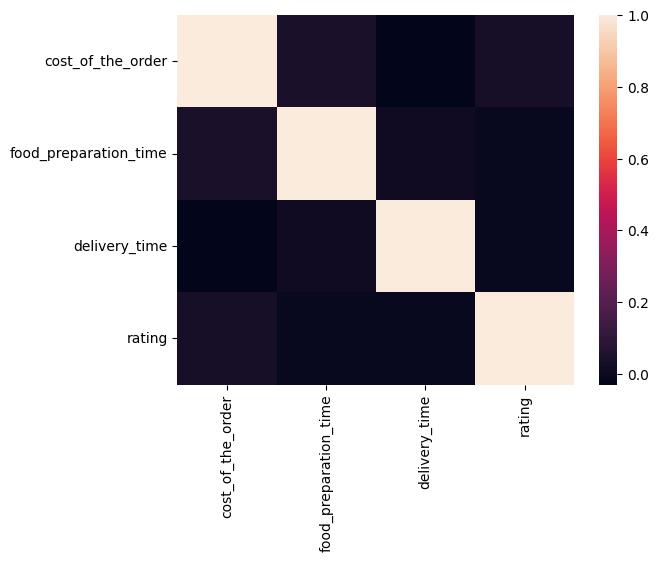

In [ ]:
sns.heatmap(data=df[['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating']].corr());

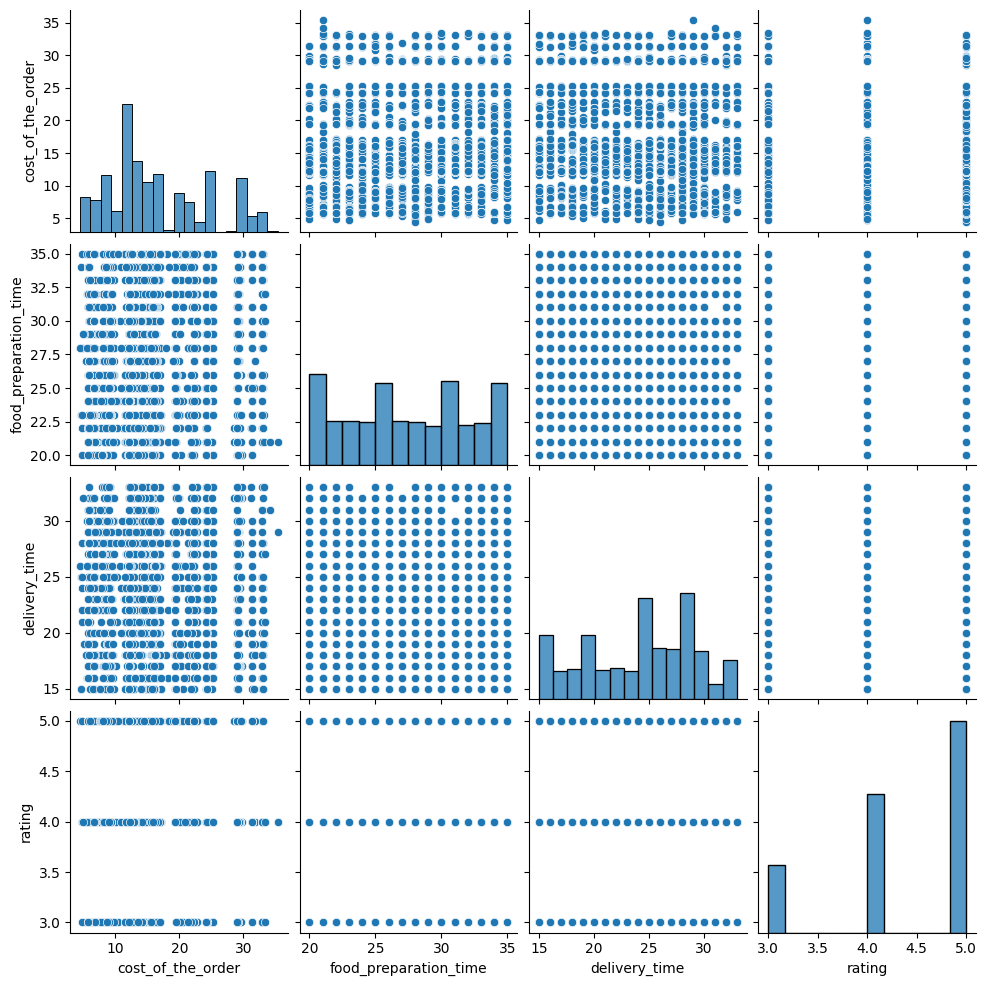

In [ ]:
#pairplot : numeric variables relationship
#plt.figure(figsize=(5,3))
ax = sns.pairplot(data = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating']]);
plt.show()

#### Observations:
* Representing the correlation for each pair of columns in the data.
* This indicates that, numerical variables are not having strong positive relationship.

#### catplot : Relationship between cuisine_type and cost_of_the_order with third variable rating

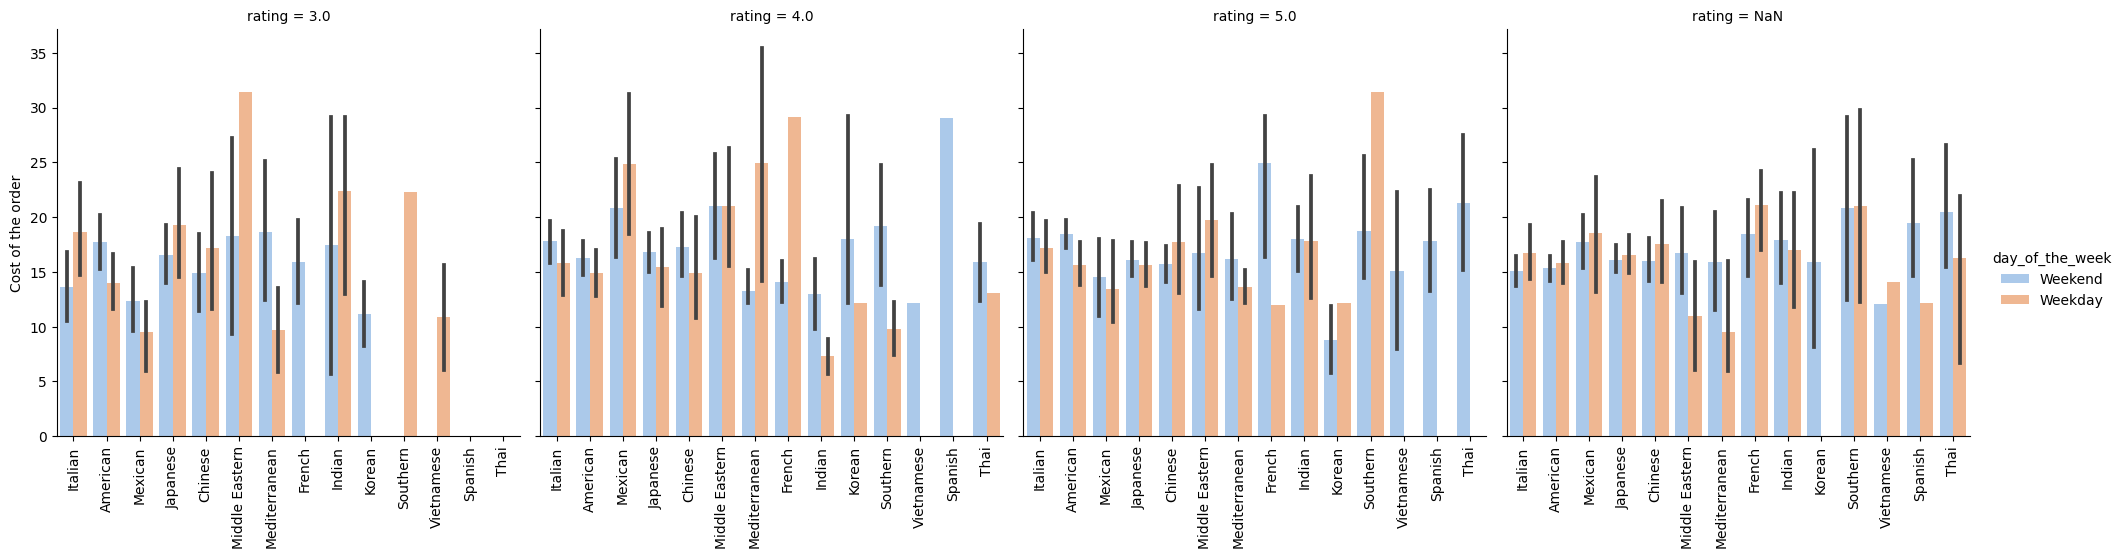

In [ ]:
# Relationship between cuisine_type and cost_of_the_order with third variable rating
#plt.figure(figsize=(11,7))
df_rating_na = df.sort_values('rating')
df_rating_na['rating'] = df_rating_na['rating'].fillna("NaN")
ax = sns.catplot(data=df_rating_na, x="cuisine_type", y="cost_of_the_order", hue="day_of_the_week", col="rating", kind='bar', palette='pastel');
ax.tick_params(axis='x', rotation=90)
ax.set_xlabels('')
ax.set_ylabels('Cost of the order')
plt.show();

#### Observations:
* Orders with ratings have higher cost_of_the_order than orders without ratings
* Most of the placed orders with rating 4 having cost_of_the_order is higher

#### cuisine_type and cost_of_the_order

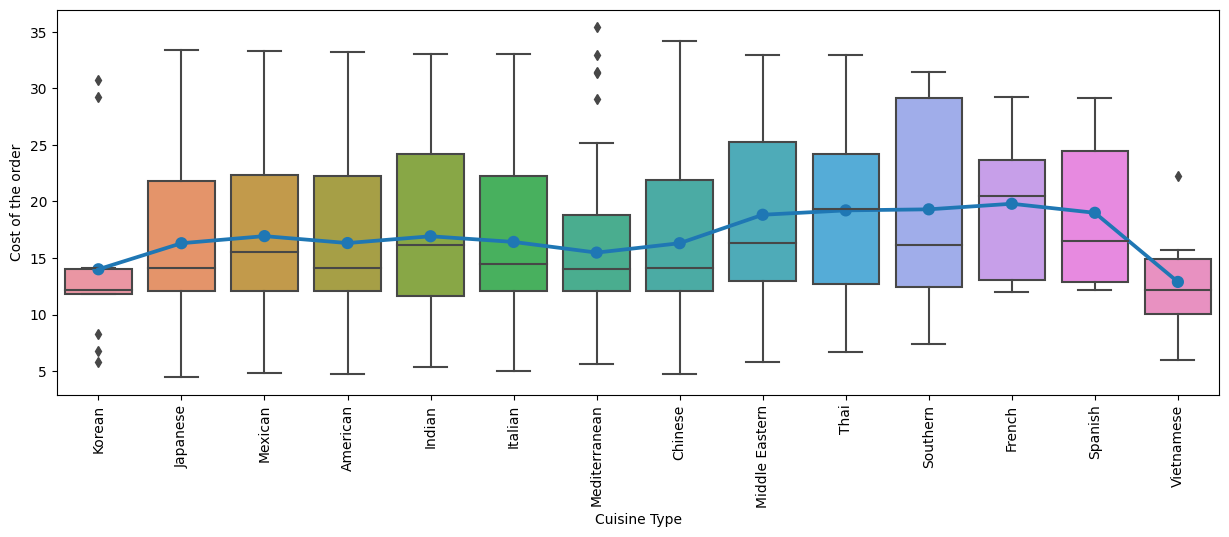

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(df,x='cuisine_type',y='cost_of_the_order' )
sns.pointplot(df,x='cuisine_type',y='cost_of_the_order', errorbar=('ci', False))
plt.xlabel("Cuisine Type")
plt.ylabel("Cost of the order")
plt.xticks(rotation=90)
plt.show()

#### Observations:
* It indicate that there are some outliers for three cuisine types, Korean, Mediterranean and Vetnamese
* Cuisine type Korean indicates outlier located below the "minimum" cost of the order value

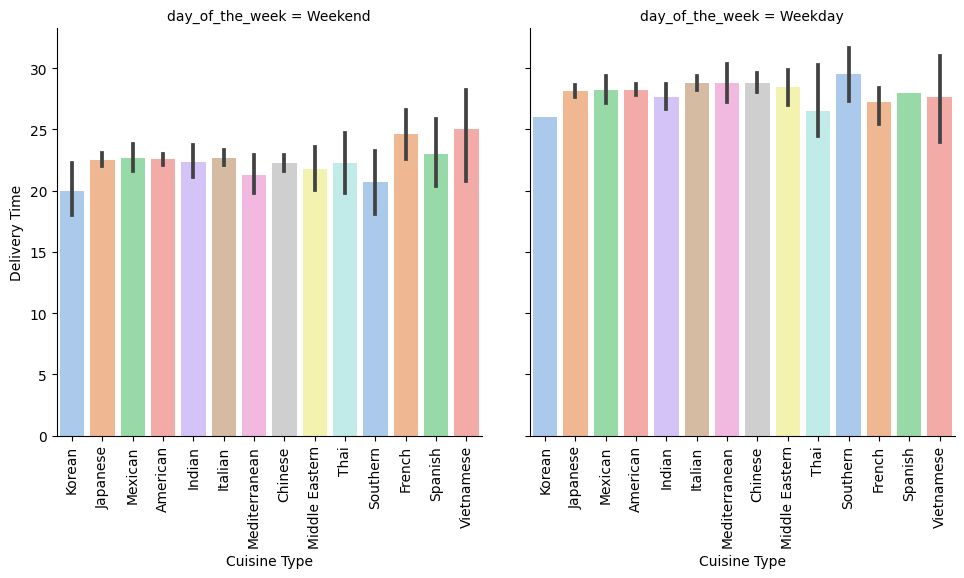

In [ ]:
# cuisine_type : delivery_time : day_of_the_week

#plt.figure(figsize=(15,5))
ax = sns.catplot(data=df, x='cuisine_type', y='delivery_time', col="day_of_the_week",kind='bar', palette='pastel');
ax.tick_params(axis='x', rotation=90)
ax.set_xlabels('Cuisine Type')
ax.set_ylabels('Delivery Time')
plt.show();

#### Observations:
* It indicates that delivery times are higher during the weekday for all the cuisine types

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


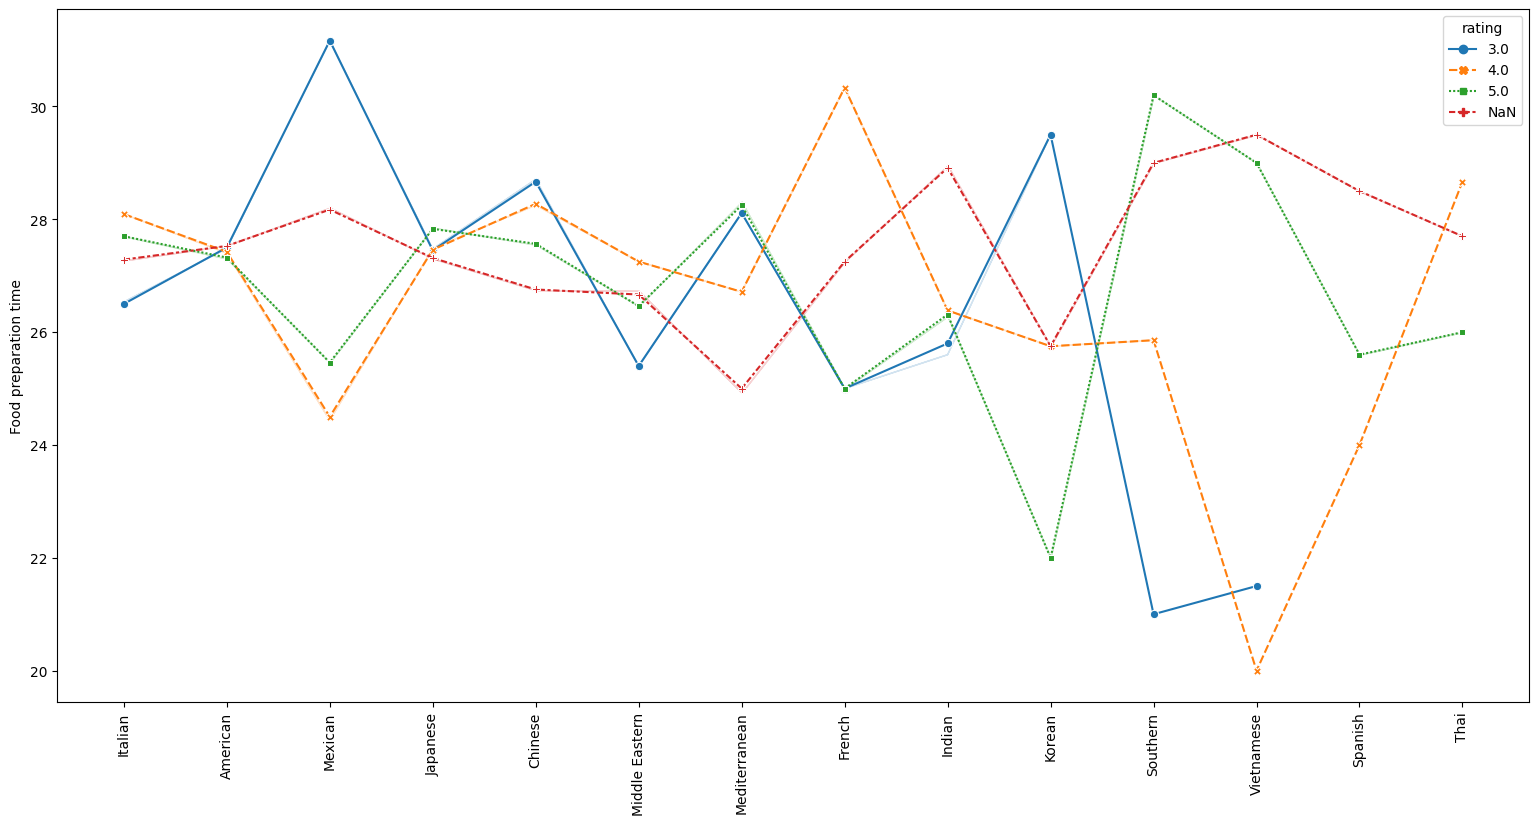

In [ ]:
#cuisine_type : food_preparation_time : rating
plt.figure(figsize = (19,9))
df_rating_nan = df.sort_values('rating')
df_rating_nan['rating'] = df_rating_nan['rating'].fillna("NaN")
sns.lineplot(data = df_rating_nan , x = 'cuisine_type' , y = 'food_preparation_time', hue = 'rating',style="rating",errorbar=('ci', False),markers = True)
plt.ylabel('Food preparation time')
plt.xlabel('')
#plt.legend(bbox_to_anchor=[1, 1]);
plt.xticks(rotation=90)
plt.show()

#### Observations:
* In cuisine type Vietnamese takes less food preparation time as compare to other cuisine types

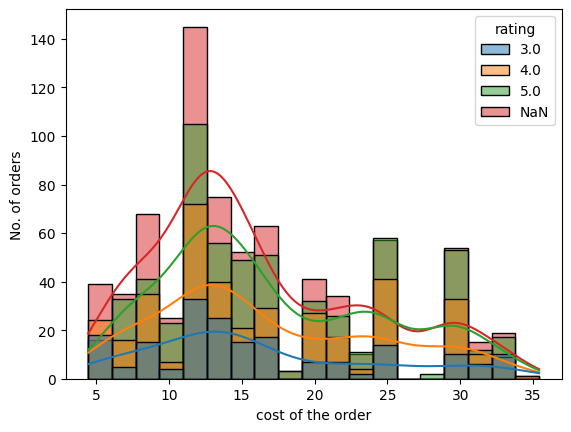

In [ ]:
#orders : cost_of_the_order : rating

df_rating_cost = df.sort_values('rating')
df_rating_cost['rating'] = df_rating_cost['rating'].fillna("NaN")
sns.histplot(data = df_rating_cost, x = 'cost_of_the_order', hue = 'rating', kde = True);
plt.ylabel('No. of orders')
plt.xlabel('cost of the order')
plt.show()

#### Observations:
* Most of the order cost about 11 USD
* Also, most of the ratings provided by customer where order cost is about 11 USD

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
#get the restaurant rating count
df_rating = df.groupby('restaurant_name')['rating'].count().sort_values(ascending=False).reset_index()

#get the restaurant average rating
df_mean_rating =df.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False).reset_index()

#rename the rating columns name to mean to avoid the error in merge
df_mean_rating.rename(columns={'rating':'mean'},inplace=True)

#create new dataset
df_customer_rating = pd.merge(df_rating,df_mean_rating,how='outer',on='restaurant_name')

#Filter out restaurants fulfilling the criteria
df_customer_rating[(df_customer_rating['rating']>50) & (df_customer_rating['mean']>4)]


,restaurant_name,rating,mean
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


#### Observations:
1. Only 4 restaurants are qualify for the promotional offer.
2. They all have more than 50 rating and average rating greater than 4.
3. The Meatball Shop is the highest rated restaurant with an average rating of 4.5
4. The Shake Shack has highest rating counts of 133


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# function : return the revenue
def getRevenue(val):
  sum = 0
  for i in val:
    if (i > 20):
        sum = sum + (i*0.25)
    elif (5 < i < 20):
        sum = sum + (i*0.15)
    else:
        sum = sum + (i*0)
  return sum

In [ ]:
print('The net revenue on total orders:', "{:.2f}".format(getRevenue(df['cost_of_the_order'])))

The net revenue on total orders: 6166.30


#### Observations:
The net revenue on total orders totals : 6,166.30 USD


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# function : return order delivery time percent
def getOrderDeliveryTime(total_time):
  sum = 0
  for i in total_time:
    if i > 60:
        sum = sum + 1
  return sum/len(total_time)*100

In [ ]:
total_delivery_time = df['food_preparation_time'] + df['delivery_time']
print('Percentage:', '{:.2f}%'.format(getOrderDeliveryTime(total_delivery_time)))

Percentage: 10.54%


#### Observations:
Approximately 10.5% of customers orders take more than 60 minutes to get delivered

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

In [ ]:
df_weekend=df[df.day_of_the_week=='Weekend']
df_weekday=df[df.day_of_the_week=='Weekday']

In [ ]:
weekend_delivery_time=round(df_weekend.delivery_time.mean(),2)
print("weekend_delivery_time:",weekend_delivery_time)

weekend_delivery_time: 22.47


In [ ]:
weekday_delivery_time=round(df_weekday.delivery_time.mean(),2)
print("weekday_delivery_time:",weekday_delivery_time)

weekday_delivery_time: 28.34


In [ ]:
print("The difference between average weekeday and weekend delivery times:",round(weekday_delivery_time-weekend_delivery_time,2))

The difference between average weekeday and weekend delivery times: 5.87


In [ ]:
df_weekend.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.351000e+03,1351.000000,1351.000000,822.000000,1351.000000,1351.000000
mean,1.477500e+06,170422.561066,16.574833,4.358881,27.436714,22.470022
std,5.541681e+02,113403.749068,7.486979,0.731350,4.601476,4.628938
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477016e+06,77665.000000,12.080000,4.000000,23.000000,18.500000
50%,1.477505e+06,127934.000000,14.410000,5.000000,27.000000,22.000000
75%,1.477980e+06,268958.000000,22.285000,5.000000,31.000000,27.000000
max,1.478444e+06,405334.000000,33.370000,5.000000,35.000000,30.000000


In [ ]:
df_weekday.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,5.470000e+02,547.000000,547.000000,340.000000,547.000000,547.000000
mean,1.477483e+06,173010.771481,16.311188,4.308824,27.212066,28.340037
std,5.329454e+02,114505.333032,7.479521,0.765351,4.708616,2.891428
min,1.476559e+06,5693.000000,4.750000,3.000000,20.000000,24.000000
25%,1.477043e+06,78913.000000,12.080000,4.000000,23.000000,26.000000
50%,1.477457e+06,130521.000000,14.070000,4.000000,27.000000,28.000000
75%,1.477929e+06,276192.000000,22.285000,5.000000,31.000000,31.000000
max,1.478435e+06,404649.000000,35.410000,5.000000,35.000000,33.000000


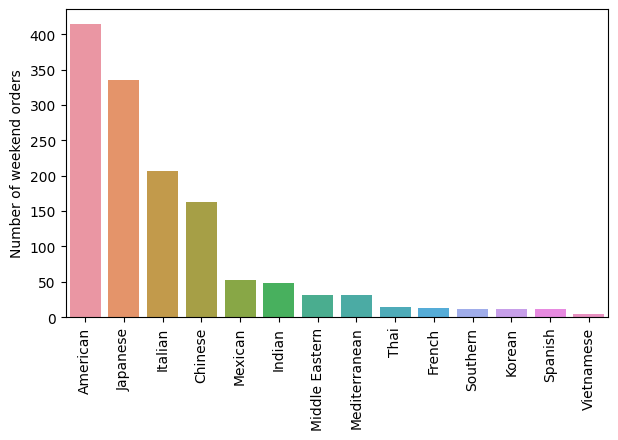

In [ ]:
#countplot : Number of weekend orders
plt.figure(figsize=(7,4))
ax=sns.countplot(data=df_weekend, x='cuisine_type', order= df['cuisine_type'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='')
ax.set(ylabel='Number of weekend orders')
plt.show()

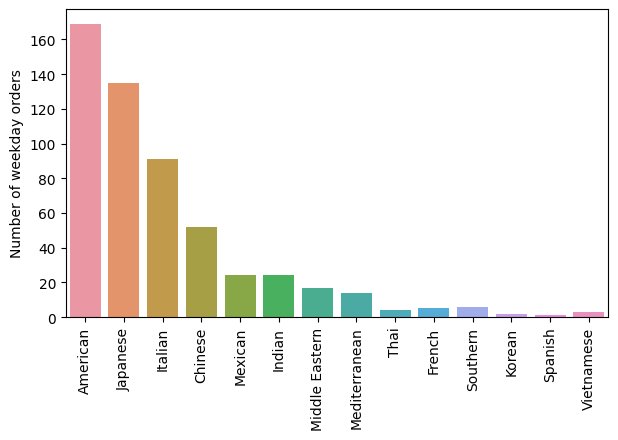

In [ ]:
#countplot : Number of weekday orders
plt.figure(figsize=(7,4))
ax=sns.countplot(data=df_weekday, x='cuisine_type', order= df['cuisine_type'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='')
ax.set(ylabel='Number of weekday orders')
plt.show()

In [ ]:
print("Top-ten most ordered restaurant on weekends:")
df_weekend.restaurant_name.value_counts().head(10)

Top-ten most ordered restaurant on weekends:


Shake Shack                  145
The Meatball Shop             95
Blue Ribbon Sushi             85
Blue Ribbon Fried Chicken     74
RedFarm Broadway              44
RedFarm Hudson                44
Parm                          42
TAO                           37
Han Dynasty                   36
Rubirosa                      29
Name: restaurant_name, dtype: int64

In [ ]:
print("Top-ten most ordered restaurant on weekdays:")
df_weekday.restaurant_name.value_counts().head(10)

Top-ten most ordered restaurant on weekdays:


Shake Shack                      74
The Meatball Shop                37
Blue Ribbon Sushi                34
Parm                             26
Blue Ribbon Fried Chicken        22
Blue Ribbon Sushi Bar & Grill    15
RedFarm Broadway                 15
Sushi of Gari 46                 13
Nobu Next Door                   13
TAO                              12
Name: restaurant_name, dtype: int64

In [ ]:
print("weekend orders delivery time for each cuisine type:")
df_weekend.groupby('cuisine_type')['delivery_time'].mean().sort_values(ascending=False)

weekend orders delivery time for each cuisine type:


cuisine_type
Vietnamese        25.000000
French            24.615385
Spanish           23.000000
Italian           22.705314
Mexican           22.641509
American          22.542169
Japanese          22.519403
Indian            22.346939
Chinese           22.269939
Thai              22.266667
Middle Eastern    21.750000
Mediterranean     21.312500
Southern          20.727273
Korean            20.000000
Name: delivery_time, dtype: float64

In [ ]:
print("weekday orders delivery time for each cuisine type:")
df_weekday.groupby('cuisine_type')['delivery_time'].mean().sort_values(ascending=False)

weekday orders delivery time for each cuisine type:


cuisine_type
Southern          29.500000
Chinese           28.826923
Italian           28.802198
Mediterranean     28.785714
Middle Eastern    28.470588
Mexican           28.250000
American          28.248521
Japanese          28.133333
Spanish           28.000000
Vietnamese        27.666667
Indian            27.625000
French            27.200000
Thai              26.500000
Korean            26.000000
Name: delivery_time, dtype: float64

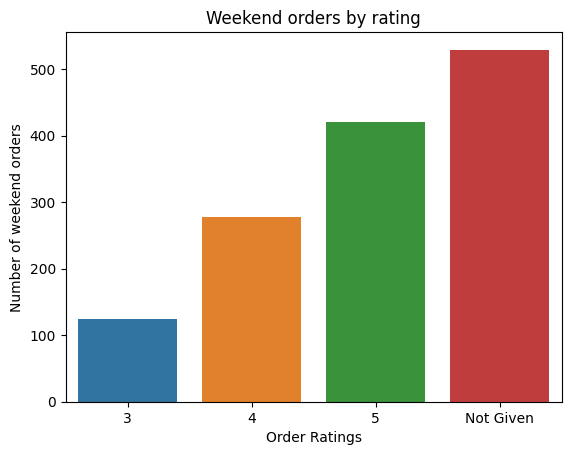

In [ ]:
#countplot : weekend Order Ratings
df_1 = df_weekend.sort_values('rating')
df_1['rating'] = df_1['rating'].fillna("NaN")
ax = sns.countplot(data = df_1, x = 'rating');
ax.set(xlabel="Order Ratings")
ax.set(ylabel='Number of weekend orders')
plt.title("Weekend orders by rating")
plt.xticks(np.arange(4), ("3","4","5","Not Given"))
plt.show();

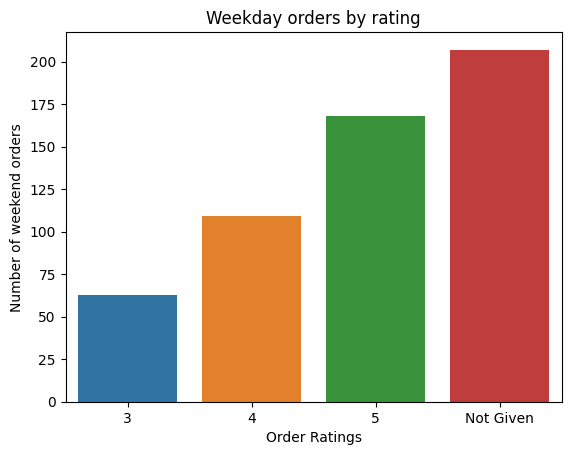

In [ ]:
#countplot : weekday Order Ratings
df_2=df_weekday.sort_values('rating')
df_2['rating'] = df_2['rating'].fillna("NaN")
ax = sns.countplot(data = df_2, x = 'rating');
ax.set(xlabel="Order Ratings")
ax.set(ylabel='Number of weekend orders')
plt.title("Weekday orders by rating")
plt.xticks(np.arange(4), ("3","4","5","Not Given"))
plt.show();

In [ ]:
print("Average cost of weekend orders by rating:")
df_weekend_rating = df_weekend.copy()
df_weekend_rating['rating'] = df_weekend_rating['rating'].fillna("NaN")
print(df_weekend_rating.groupby('rating')['cost_of_the_order'].mean())



Average cost of weekend orders by rating:
rating
3.0    16.197120
4.0    16.994585
5.0    17.229310
NaN    15.924669
Name: cost_of_the_order, dtype: float64


In [ ]:
print("Average cost of weekday orders by rating:")
df_weekday_rating = df_weekday.copy()
df_weekday_rating['rating'] = df_weekday_rating['rating'].fillna("NaN")
print(df_weekday_rating.groupby('rating')['cost_of_the_order'].mean())

Average cost of weekday orders by rating:
rating
3.0    16.275397
4.0    15.987982
5.0    16.306667
NaN    16.495942
Name: cost_of_the_order, dtype: float64


#### Observations:


1.   The average delivery time on weekdays is greater than during the weekend
2.   Deliveries during weekdays, on average, almost 6 minutes longer than during weekends



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

### Conclusions:
1. #### Customer Orders :
  * The majority of FoodHub customers have only placed ONE single order
  * Second highest population has only placed TWO orders
     - ONE single order : 65% (784 customers)
     - TWO orders : 22% (267 customers)

2. #### Orders Received by the Restaurants :
  * Only three restaurants received approximately more than 100 orders
  * Other restaurants hardly received 50 orders
    - Shake Shack - 219
    - The Meatball Shop - 132
    - Blue Ribbon Sushi - 119
  
  * Specific cuisine types experienced hight number of orders
    - American: 584
    - Japanese: 470
    - Italian: 298
    - Chinese: 215
    - Mexican: 77
    - Indian: 73
    - Middle Eastern: 49
    - Mediterranean: 46
    - Thai: 19
    - French: 18
    - Southern: 17
    - Korean: 13
    - Spanish: 12
    - Vietnamese: 7

  * Order durations :
    * The majority of FoodHub orders were placed during the weekend
      - Weekend: 1351
      - Weekday: 547

3. #### Feedback Ratings :
  * Only 4 restaurants  have more than 50 rating count
  * Average rating greater than 4
          Restaurant             Total Rating     Rating Average
          Shake Shack                 133         4.278195
          The Meatball Shop           84          4.511905
          Blue Ribbon Sushi           73          4.219178
          Blue Ribbon Fried Chicken   64          4.328125




### Recommendations:

 #### Customers Orders :

  * Ordered less than three times :
    - Need to understand their customer experience to identify root causes, what stopped them from ordering.
      - Some recommendations -
        1. Exclusive Welcome Offer :
          * Strategy : Offer an exclusive welcome discount or a complimentary item on the customer's next order.
        2. Frequent Diner Rewards :
          * Strategy : Introduce a loyalty program where customers earn points for each order, leading to discounts or free items after a certain number of orders.

  * Orders more frequently :
    - Some recommendations -
      1. VIP Loyalty :
        * Strategy : Introduce a VIP loyalty for your most frequent customers, offering exclusive benefits such as higher discounts, priority delivery.
      2. Personalized Loyalty Perks:
        * Strategy : Create personalized offers based on the customer's order history, providing discounts or complimentary items on their favorite menu items.

  * Certainly! When certain restaurants and cuisine types experience a high number of orders, it's important to manage the demand effectively.
    - Some recommendations -
      1. Optimize Operations :
        * Strategy  : Invest in kitchen automation, optimize workflows, and ensure staff is well-trained to handle peak hours. This will reduce waiting times and enhance customer satisfaction.
      2. Create Special High-Demand Menus :
        * Strategy  : Create a special menu for busy periods, focusing on the most ordered and quickly prepared dishes. This can reduce kitchen congestion and enhance overall efficiency.

    * Specific cuisine types are experiencing a high number of orders
      1. Diversify Menu within Popular Cuisine :
        * Strategy : Expand the menu within the popular cuisine to offer a wider variety of dishes.
      2. Highlight Signature Dishes :
        * Strategy : Create a section on the menu specifically for signature dishes, this can help customers discover standout items and encourage repeat orders.


#### Feedback Ratings :
  - Leveraging feedback ratings for cuisine types can help businesses not only meet customer expectations but also continuously improve their offerings
    1. Continuous Quality Assurance :
      * Strategy : Regularly monitor and analyze feedback ratings for the cuisine to identify areas of improvement.

    2. Customer Feedback Incentives :
      * Strategy : Encourage customers to provide feedback by offering discounts or special offer on their next order

    3. Adapt and Innovate Based on Feedback :
      * Strategy : Regularly assess feedback to identify trends and customer preferences.

    4. Surveys for Continuous Improvement :
      * Strategy :  Send out surveys to customers who have ordered. Use this information to refine the menu, address concerns, and enhance the overall dining experience.

##### * By implementing these recommendations into the business strategy, restaurants can not only sustain the high demand for specific cuisine types but also earn customer loyalty and drive continuous improvement.




---